# MNIST Dataset

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D, Flatten,\
                                    MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD, Adadelta

early = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
lr_decay = ReduceLROnPlateau(monitor='val_loss', 
                             patience=3, verbose=1, 
                             factor=0.8, min_lr=3e-4)
%matplotlib inline

In [2]:
# Load the datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#categorize t
n_classes = len(np.unique(y_train)) #10
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
y_train_cat = to_categorical(y_train, num_classes=n_classes)
y_val_cat = to_categorical(y_val, num_classes=n_classes)
y_test_cat = to_categorical(y_test, num_classes=n_classes)
#reshape X
X_train = X_train.reshape(len(X_train),28,28,1)
X_val = X_val.reshape(len(X_val),28,28,1)
X_test = X_test.reshape(len(X_test),28,28,1)

11493376/11490434 [==============================] - 0s 0us/step


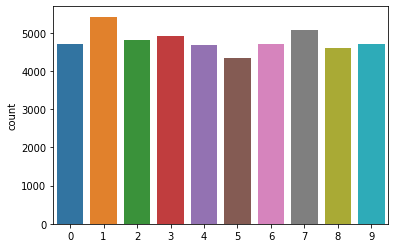

In [3]:
#classi bilanciate
sns.countplot(y_train)
plt.show()

In [0]:
def plot_history(network_history, metric='acc'):
    plt.figure(figsize=(15,7))
    ax1 = plt.subplot(121)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    ax1.plot(network_history.history['loss'])
    ax1.plot(network_history.history['val_loss'])
    ax1.legend(['Training', 'Validation'])

    ax2 = plt.subplot(122)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    ax2.plot(network_history.history[metric])
    ax2.plot(network_history.history['val_'+metric])
    ax2.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

# ANN Model

In [5]:
input_layer = Input(shape=(28,28,1))
l = Flatten()(input_layer)
output = Dense(n_classes, activation='softmax')(l)
model = Model(input_layer, output)
model.compile(loss='categorical_crossentropy',optimizer=Adam(), metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 25us/sample - loss: 17.3685 - acc: 0.7545 - val_loss: 6.9439 - val_acc: 0.8574
Epoch 2/50
48000/48000 [==============================] - 1s 11us/sample - loss: 5.9635 - acc: 0.8651 - val_loss: 5.2735 - val_acc: 0.8707
Epoch 3/50
48000/48000 [==============================] - 0s 10us/sample - loss: 4.6511 - acc: 0.8769 - val_loss: 4.4823 - val_acc: 0.8773
Epoch 4/50
48000/48000 [==============================] - 0s 10us/sample - loss: 3.9177 - acc: 0.8828 - val_loss: 3.8763 - val_acc: 0.8844
Epoch 5/50
48000/48000 [==============================] - 0s 10us/sample - loss: 3.4800 - acc: 0.8845 - val_loss: 3.5721 - val_acc: 0.8836
Epoch 6/50
48000/48000 [==============================] - 1s 11us/sample - loss: 3.1174 - acc: 0.8867 - val_loss: 3.2073 - val_acc: 0.8901
Epoch 7/50
48000/48000 [==============================] - 0s 10us/sample - loss: 2.8217 - acc: 0.8909 - val_loss: 3

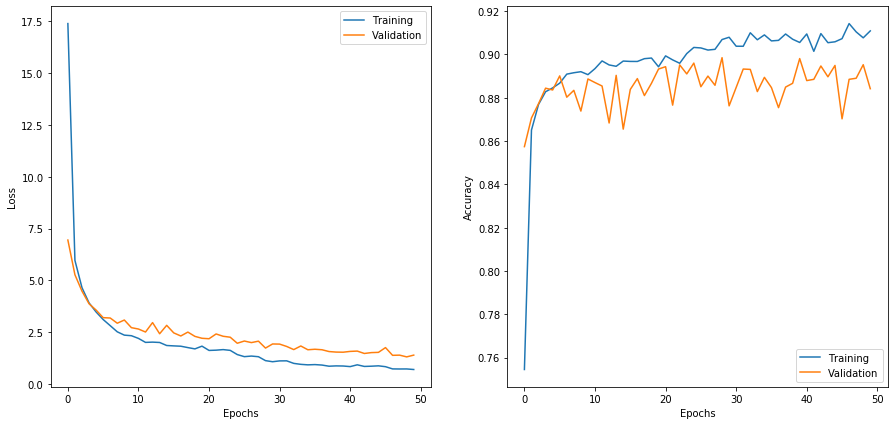

In [6]:
history = model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), 
                    epochs = 50, batch_size=256, verbose=1,
                    callbacks=[lr_decay, early])
plot_history(history)

In [7]:
print("In Testing")
print(classification_report(y_test, model.predict(X_test).argmax(axis=1),digits=4))

In Testing
              precision    recall  f1-score   support

           0     0.9601    0.9582    0.9591       980
           1     0.9829    0.9128    0.9466      1135
           2     0.8835    0.8963    0.8899      1032
           3     0.7506    0.9238    0.8282      1010
           4     0.8932    0.9196    0.9062       982
           5     0.8664    0.8576    0.8620       892
           6     0.9440    0.9154    0.9295       958
           7     0.8685    0.9125    0.8899      1028
           8     0.8354    0.7710    0.8019       974
           9     0.9212    0.7998    0.8562      1009

    accuracy                         0.8874     10000
   macro avg     0.8906    0.8867    0.8870     10000
weighted avg     0.8917    0.8874    0.8878     10000



# Model (7,492 parameters)

In [8]:
input_layer = Input(shape=(28,28,1))
l = Conv2D(16, 3, activation='relu')(input_layer)
l = BatchNormalization()(l)
l = MaxPooling2D((2,2))(l)
l = Conv2D(16, 3, activation='relu')(l)
l = BatchNormalization()(l)
l = Conv2D(4, 3, activation='relu')(l)
l = BatchNormalization()(l)
l = MaxPooling2D((2,2))(l)
l = Flatten()(l)
l = Dense(58, activation='relu')(l)
l = Dropout(0.20)(l)
output = Dense(n_classes, activation='softmax')(l)
model = Model(input_layer, output)
model.compile(loss='categorical_crossentropy',optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 4)           580 

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 4s 90us/sample - loss: 0.8642 - acc: 0.7356 - val_loss: 0.2374 - val_acc: 0.9294
Epoch 2/25
48000/48000 [==============================] - 1s 25us/sample - loss: 0.2294 - acc: 0.9303 - val_loss: 0.1332 - val_acc: 0.9604
Epoch 3/25
48000/48000 [==============================] - 1s 25us/sample - loss: 0.1468 - acc: 0.9561 - val_loss: 0.0963 - val_acc: 0.9706
Epoch 4/25
48000/48000 [==============================] - 1s 25us/sample - loss: 0.1121 - acc: 0.9663 - val_loss: 0.0802 - val_acc: 0.9757
Epoch 5/25
48000/48000 [==============================] - 1s 25us/sample - loss: 0.0915 - acc: 0.9720 - val_loss: 0.0660 - val_acc: 0.9778
Epoch 6/25
48000/48000 [==============================] - 1s 25us/sample - loss: 0.0795 - acc: 0.9759 - val_loss: 0.0591 - val_acc: 0.9801
Epoch 7/25
48000/48000 [==============================] - 1s 24us/sample - loss: 0.0707 - acc: 0.9778 - val_loss: 0.

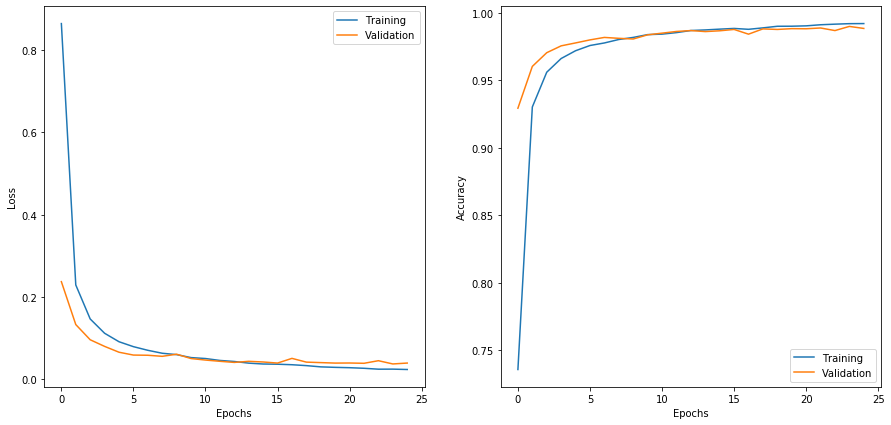

In [9]:
history = model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), 
                    epochs = 25, batch_size=256, verbose=1,
                    callbacks=[lr_decay, early])
plot_history(history)

In [10]:
model.evaluate(X_train, y_train_cat)[1]

48000/48000 [==============================] - 3s 59us/sample - loss: 0.0132 - acc: 0.9960


0.99604166

In [11]:
model.evaluate(X_val, y_val_cat)[1]

12000/12000 [==============================] - 1s 61us/sample - loss: 0.0397 - acc: 0.9886


0.9885833

In [12]:
input_layer = Input(shape=(28,28,1))
l = Conv2D(16, 3, activation='relu')(input_layer)
l = BatchNormalization()(l)
l = MaxPooling2D((2,2))(l)
l = Conv2D(16, 3, activation='relu')(l)
l = BatchNormalization()(l)
l = Conv2D(4, 3, activation='relu')(l)
l = BatchNormalization()(l)
l = MaxPooling2D((2,2))(l)
l = Flatten()(l)
l = Dense(58, activation='relu')(l)
l = Dropout(0.20)(l)
output = Dense(n_classes, activation='softmax')(l)
model = Model(input_layer, output)
model.compile(loss='categorical_crossentropy',optimizer=Adam(), metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train_cat, epochs = 30, batch_size=256, verbose=1)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
batch_normalization_4 (Batch (None, 11, 11, 16)        64        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 4)           580 

In [13]:
print("In Testing")
print(classification_report(y_test, model.predict(X_test).argmax(axis=1),digits=4))

In Testing
              precision    recall  f1-score   support

           0     0.9949    0.9939    0.9944       980
           1     0.9860    0.9956    0.9908      1135
           2     0.9941    0.9855    0.9898      1032
           3     0.9921    0.9891    0.9906      1010
           4     0.9878    0.9908    0.9893       982
           5     0.9855    0.9922    0.9888       892
           6     0.9937    0.9885    0.9911       958
           7     0.9874    0.9874    0.9874      1028
           8     0.9897    0.9887    0.9892       974
           9     0.9821    0.9812    0.9817      1009

    accuracy                         0.9893     10000
   macro avg     0.9893    0.9893    0.9893     10000
weighted avg     0.9893    0.9893    0.9893     10000

